In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Loss Function

### Mean Square Error

$$E=\sum_{k}{(t_k-y_k)^{2}}$$

* $y_k$ : the softmax output
* $t_k$ : true labeling in one hot

In [2]:
# y: the softmax output
# t: true labeling
def mean_square_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(mean_square_error(y,t))

0.09750000000000003


In [4]:
y_2 = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t_2 = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(mean_square_error(y_2,t_2))

0.5975


### Cross Entropy Error

$$E=-\sum_kt_klog{y_k}$$

#### Log function

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


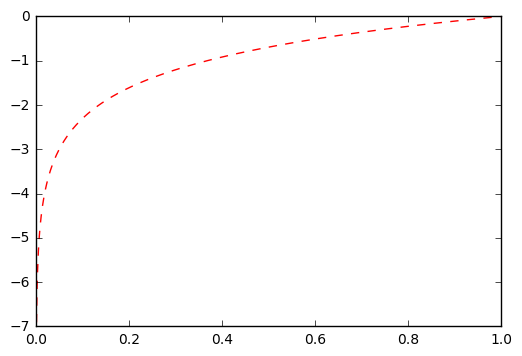

In [5]:
logx = np.arange(-0, 1.0, 0.001)
logy = np.log(logx)

plt.plot(logx, logy, linestyle='--', color="red")
plt.show()

#### Main Loss Function Body

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return (-1) * np.sum(t * np.log(y + delta))

In [7]:
print(cross_entropy_error(y,t))

0.510825457099338


In [8]:
print(cross_entropy_error(y_2,t_2))

2.302584092994546


Compare to the log function which y-value is multiplied by -1.

In [9]:
logy_2 = -np.log(logx + 1e-7)

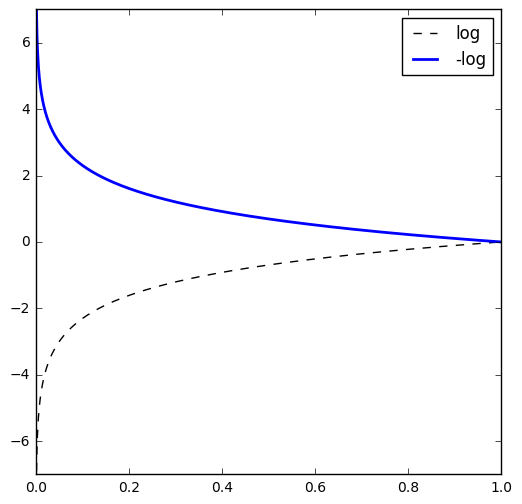

In [10]:
fig = plt.figure()
plt.plot(logx, logy, linestyle='--', label="log", color="black")
plt.plot(logx, logy_2, linestyle='-', linewidth=2, label="-log", color="blue")
plt.ylim(-7,7)
fig.set_figheight(6)
fig.set_figwidth(6)
plt.legend()
plt.show()

### Cross Entropy Error in Batch training

$$E = -\frac{1}{N}\sum_n\sum_kt_{nk}log{y_{nk}}$$

In [11]:
def random_choice(size, batch_size):
    return np.random.choice(size, batch_size)

In [12]:
print(random_choice(60000, 10))

[18637 38138 47138 43555 13201 15216 52573 14404 29471 29413]


In [13]:
y_b = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0], [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])
print(y_b)

[[0.1  0.05 0.6  0.   0.05 0.1  0.   0.1  0.   0.  ]
 [0.1  0.05 0.1  0.   0.05 0.1  0.   0.6  0.   0.  ]]


In [14]:
def cross_entropy_error_batch(y, t):
    if y.ndim == 1:
        # reshape to (1,size)
        y = np.reshape(1, y.size)
        t = np.reshape(1, t.size)
    
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / batch_size

In [15]:
print(cross_entropy_error_batch(y_b, t))

1.406704775046942


Equal to the following calculation.

In [16]:
-np.sum((t * np.log(y_b[0] + 1e-7) + t * np.log(y_b[1] + 1e-7))) / 2.0

1.406704775046942

In [17]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        y = np.shape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size

In [18]:
cross_entropy_error_label(y_b, 2)

1.4067053583800182

In [19]:
y_b

array([[0.1 , 0.05, 0.6 , 0.  , 0.05, 0.1 , 0.  , 0.1 , 0.  , 0.  ],
       [0.1 , 0.05, 0.1 , 0.  , 0.05, 0.1 , 0.  , 0.6 , 0.  , 0.  ]])

## differentiation

### central differeniation

$$\lim_{h \rightarrow 0} = \frac{f(x+h) - f(x)}{h} = \frac{f(x+h) - f(x-h)}{2h}$$

In [20]:
def numerical_diff(y,x):
    h = 1e-4
    return (y(x+h) - y(x-h)) / (2*h)

In [21]:
def function1(x):
    return (0.01)*(x**2) + 0.1*x

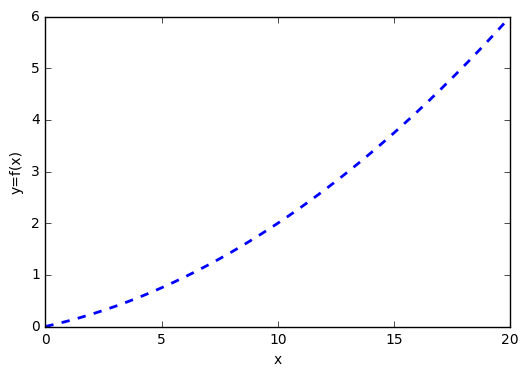

In [22]:
x = np.arange(0,20,0.1)
y = function1(x)
plt.plot(x, y, linestyle='--', linewidth=2)
plt.xlabel("x")
plt.ylabel("y=f(x)")
plt.show()

In [23]:
print(numerical_diff(function1, 5))
print(numerical_diff(function1, 10))

s5 = numerical_diff(function1, 5)
s10 = numerical_diff(function1, 10)

print(function1(5))     # 0.75 = s5*5 - 0.25
print(function1(10))

0.1999999999990898
0.2999999999986347
0.75
2.0


In [24]:
def linefunc(x):
    return (s5*x - 0.25)

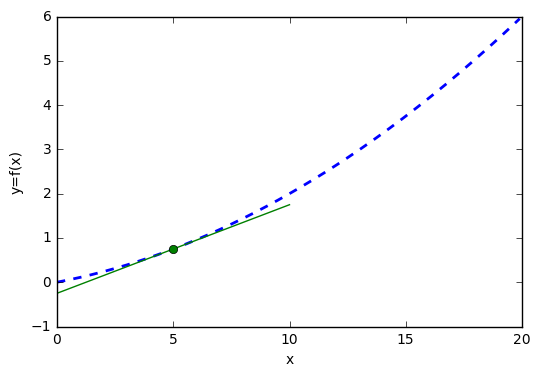

In [25]:
x = np.arange(0,20,0.1)
y = function1(x)
plt.plot(x, y, linestyle='--', linewidth=2)
# lines = plt.plot(x1, y1, x2, y2)
npts = np.array([0, 10])
plt.plot(npts, linefunc(npts), color="green")
plt.plot(np.array([5]), np.array([function1(5)]), "go")
plt.xlabel("x")
plt.ylabel("y=f(x)")
plt.show()

### partial differeniation

$$f(x_{0},x_{1}) = x_{0}^{2} +x_{1}^{2}$$

In [26]:
_x0 = np.linspace(-2, 2, 10)
_x1 = np.linspace(-2, 2, 10)

x0, x1 = np.meshgrid(_x0, _x1)

def two_var_func(x_1, x_2):
    return (x_1 ** 2.0) + (x_2 ** 2.0)

fy = two_var_func(x0, x1)
print(fy)

[[8.         6.41975309 5.2345679  4.44444444 4.04938272 4.04938272
  4.44444444 5.2345679  6.41975309 8.        ]
 [6.41975309 4.83950617 3.65432099 2.86419753 2.4691358  2.4691358
  2.86419753 3.65432099 4.83950617 6.41975309]
 [5.2345679  3.65432099 2.4691358  1.67901235 1.28395062 1.28395062
  1.67901235 2.4691358  3.65432099 5.2345679 ]
 [4.44444444 2.86419753 1.67901235 0.88888889 0.49382716 0.49382716
  0.88888889 1.67901235 2.86419753 4.44444444]
 [4.04938272 2.4691358  1.28395062 0.49382716 0.09876543 0.09876543
  0.49382716 1.28395062 2.4691358  4.04938272]
 [4.04938272 2.4691358  1.28395062 0.49382716 0.09876543 0.09876543
  0.49382716 1.28395062 2.4691358  4.04938272]
 [4.44444444 2.86419753 1.67901235 0.88888889 0.49382716 0.49382716
  0.88888889 1.67901235 2.86419753 4.44444444]
 [5.2345679  3.65432099 2.4691358  1.67901235 1.28395062 1.28395062
  1.67901235 2.4691358  3.65432099 5.2345679 ]
 [6.41975309 4.83950617 3.65432099 2.86419753 2.4691358  2.4691358
  2.86419753 3

In [27]:
x1

array([[-2.        , -2.        , -2.        , -2.        , -2.        ,
        -2.        , -2.        , -2.        , -2.        , -2.        ],
       [-1.55555556, -1.55555556, -1.55555556, -1.55555556, -1.55555556,
        -1.55555556, -1.55555556, -1.55555556, -1.55555556, -1.55555556],
       [-1.11111111, -1.11111111, -1.11111111, -1.11111111, -1.11111111,
        -1.11111111, -1.11111111, -1.11111111, -1.11111111, -1.11111111],
       [-0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667,
        -0.66666667, -0.66666667, -0.66666667, -0.66666667, -0.66666667],
       [-0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222,
        -0.22222222, -0.22222222, -0.22222222, -0.22222222, -0.22222222],
       [ 0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.22222222,
         0.22222222,  0.22222222,  0.22222222,  0.22222222,  0.22222222],
       [ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
         0.66666667,  0.66666667,  0.66666667

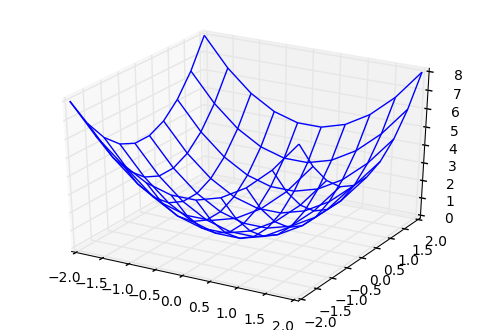

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a basic wireframe.
ax.plot_wireframe(x0, x1, fy)

plt.show()

In [29]:
# while (x0, x1) = (3, 4)
def function2_pd_x0(x0, x1=4):
    # == x0*x0 + 4.0*2.0 (fix x1)
    return x0*x0 + x1**2.0

def function2_pd_x0_2(x0, x1=4):
    return x0**2.0 + x1**2.0

In [30]:
print(numerical_diff(function2_pd_x0, 3.0))
print(numerical_diff(function2_pd_x0_2, 3.0))

6.00000000000378
6.00000000000378


In [31]:
# while (x0, x1) = (3, 4)
def function2_pd_x1(x1, x0=3):
    # == 3.0*2.0 + x1*x1 (fix x0)
    return x0**2.0 + x1*x1

In [32]:
print(numerical_diff(function2_pd_x1, 4.0))

7.999999999999119


## Gradient

In [33]:
## function for multiple variable differeniation
# x: (x0, y0)
def target_function(x):
    if x.ndim == 1:
        # return x[0]**2.0 + x[1]**2.0
        return np.sum(x ** 2.0)
    else:
        return np.sum(x ** 2.0, axis=1)

In [34]:
# f: function
# x: position to calculate partial differeniation, and data type is np.array()
def numeric_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(0, x.size, 1):
        tmp_val = x[idx]
        
        # calculate f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # calcaulate f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        # calculate gradient
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [35]:
print(numeric_gradient(target_function, np.array([3.,4.])))
print(numeric_gradient(target_function, np.array([3.,0.])))
print(numeric_gradient(target_function, np.array([0.,4.])))

[6. 8.]
[6. 0.]
[0. 8.]


### gredient map

In [36]:
## numerical gradient in batch
def numeric_gradient_batch(f, X):
    print(X.shape)
    print(X.ndim)
    if X.ndim == 1:
        return numeric_gradient(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numeric_gradient(f, x)
        
        return grad

In [37]:
print(numeric_gradient_batch(target_function, np.array([3.,4.])))

(2,)
1
[6. 8.]


In [38]:
gx = np.arange(-3,3.25,0.25)
gy = np.arange(-3,3.25,0.25)

nx, ny = np.meshgrid(gx, gy)

nx = nx.flatten()
ny = ny.flatten()

grad = numeric_gradient_batch(target_function, np.array([nx, ny]))

(2, 625)
2


In [39]:
grad

array([[-6. , -5.5, -5. , ...,  5. ,  5.5,  6. ],
       [-6. , -6. , -6. , ...,  6. ,  6. ,  6. ]])

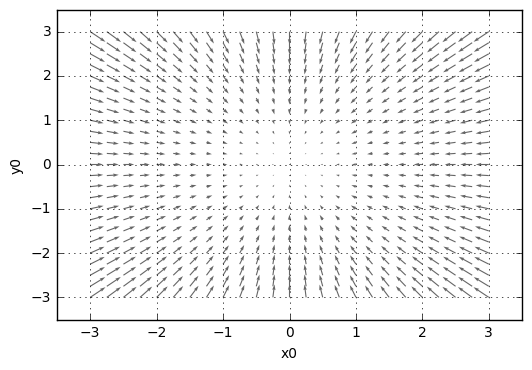

In [40]:
plt.figure()
plt.quiver(nx,ny,-grad[0],-grad[1], angles="xy", color="#666666")
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])
plt.xlabel('x0')
plt.ylabel('y0')
plt.grid()
plt.show()

The implementing concept above is not the same with differeniation. It is more likely to calculate the vector-based reference to the x-axis or y-axis. The correct way is to pass the set (x0, y0) into target_function.

The following is a better way to understand concept of multiple variable differeniation among dimensons data.

In [41]:
## numerical gradient in batch
def numeric_gradient_batch_2(f, X):
    if X.ndim == 1:
        return numeric_gradient(f, X)
    else:
        grad = np.zeros_like(X)
        
        dim,ttl = X.shape
        
        for i in range(ttl):
            grad[:,i] = numeric_gradient(f, X[:,i])
        
        return grad

In [42]:
gx_2 = np.arange(-3,3.25,0.25)
gy_2 = np.arange(-3,3.25,0.25)

nx_2, ny_2 = np.meshgrid(gx_2, gy_2)

nx_2 = nx_2.flatten()
ny_2 = ny_2.flatten()

grad_2 = numeric_gradient_batch_2(target_function, np.array([nx_2, ny_2]))

In [46]:
print(nx_2[1:10])
print(ny_2[1:10])
print(-grad_2[0][1:10])
print(-grad_2[1][1:10])

[-2.75 -2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75]
[-3. -3. -3. -3. -3. -3. -3. -3. -3.]
[5.5 5.  4.5 4.  3.5 3.  2.5 2.  1.5]
[6. 6. 6. 6. 6. 6. 6. 6. 6.]


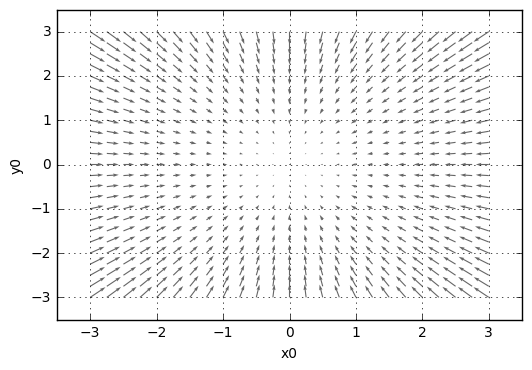

In [43]:
plt.figure()
plt.quiver(nx_2,ny_2,-grad_2[0],-grad_2[1], angles="xy", color="#666666")
plt.xlim([-3.5,3.5])
plt.ylim([-3.5,3.5])
plt.xlabel('x0')
plt.ylabel('y0')
plt.grid()
plt.show()

### Gradient Descent

$$x_{0} = x_{0} - \eta\frac{\partial{f}}{\partial{x_{0}}}$$
$$x_{1} = x_{1} - \eta\frac{\partial{f}}{\partial{x_{1}}}$$

In [52]:
def gradient_descent(f,init_x,lr=1e-1,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numeric_gradient_batch_2(f, x)
        x = x - lr*grad
    
    return x

In [54]:
init_x = np.array([-3., 4.])
print(gradient_descent(target_function, init_x))

[-6.11110793e-10  8.14814391e-10]


In [57]:
## when lr is too big, the result is bad
print(gradient_descent(target_function, init_x, lr=10))

[-2.58983747e+13 -1.29524862e+12]


In [58]:
## when lr is too small, the result is bad
print(gradient_descent(target_function, init_x, lr=1e-10))

[-2.99999994  3.99999992]


### learning with gradient descent

In [59]:
def gradient_descent(f,init_x,lr=1e-1,step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numeric_gradient_batch_2(f, x)
        x = x - lr*grad
    
    return x, np.array(x_history)

In [66]:
init_x = np.array([-3., 4.])
res, x_history = gradient_descent(target_function, init_x)

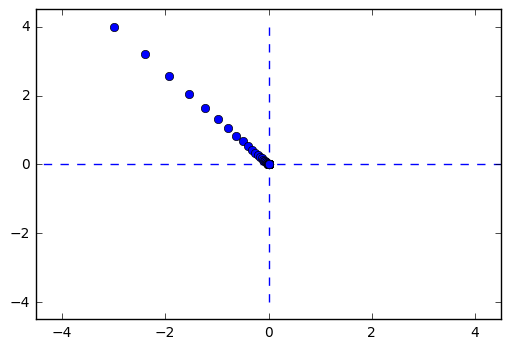

In [70]:
plt.plot([-5,5], [0,0],'--b')
plt.plot([0,0], [-4,4],'--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim([-4.5,4.5])
plt.ylim([-4.5,4.5])
plt.show()